# Eliminacja Gaussa-Jordana - Teoria Współbieżności
Piotr Świerzy

## 1) Definiujemy podstawowe zadania obliczeniowe

Aby pokazać na początku przykład to załóżmy, że macierz jest wielkości 3x3 (dla każdej macierzy 3x3 FNF będzie takie samo).

In [35]:
n = 3

Podstawowe zadania obliczeniowe:
- $A_{i, k}$ - mnożnik dla wiersza $i$ do odejmowania go od wiersza $k$
- $B_{i, j, k}$ - pomnożenie j-tego elementu wiersza $i$ przez mnożnik - do odejmowania od wiersza $k$
- $C_{i, j, k}$ - odjęcie j-tego elementu wiersza $i$ od wiersza $k$

In [36]:
def Aiks(n):
    Aiks = []
    for i in range(1, n+1):
        for j in range(1, n+1):
            if i!=j:
                Aiks.append(["A", i, j])
    return Aiks
print(Aiks(n))

def Bijks(n):
    Bijks = []
    for i in range(1, n+1):
        for j in range(1, n+2):
            for k in range(1, n+1):
                if i!=k:
                    Bijks.append(["B", i, j, k])
    return Bijks
print(Bijks(n))

def Cijks(n):
    Cijks = []
    for i in range(1, n+1):
        for j in range(1, n+2):
            for k in range(1, n+1):
                if i!=k:
                    Cijks.append(["C", i, j, k])
    return Cijks
print(Cijks(n))

[['A', 1, 2], ['A', 1, 3], ['A', 2, 1], ['A', 2, 3], ['A', 3, 1], ['A', 3, 2]]
[['B', 1, 1, 2], ['B', 1, 1, 3], ['B', 1, 2, 2], ['B', 1, 2, 3], ['B', 1, 3, 2], ['B', 1, 3, 3], ['B', 1, 4, 2], ['B', 1, 4, 3], ['B', 2, 1, 1], ['B', 2, 1, 3], ['B', 2, 2, 1], ['B', 2, 2, 3], ['B', 2, 3, 1], ['B', 2, 3, 3], ['B', 2, 4, 1], ['B', 2, 4, 3], ['B', 3, 1, 1], ['B', 3, 1, 2], ['B', 3, 2, 1], ['B', 3, 2, 2], ['B', 3, 3, 1], ['B', 3, 3, 2], ['B', 3, 4, 1], ['B', 3, 4, 2]]
[['C', 1, 1, 2], ['C', 1, 1, 3], ['C', 1, 2, 2], ['C', 1, 2, 3], ['C', 1, 3, 2], ['C', 1, 3, 3], ['C', 1, 4, 2], ['C', 1, 4, 3], ['C', 2, 1, 1], ['C', 2, 1, 3], ['C', 2, 2, 1], ['C', 2, 2, 3], ['C', 2, 3, 1], ['C', 2, 3, 3], ['C', 2, 4, 1], ['C', 2, 4, 3], ['C', 3, 1, 1], ['C', 3, 1, 2], ['C', 3, 2, 1], ['C', 3, 2, 2], ['C', 3, 3, 1], ['C', 3, 3, 2], ['C', 3, 4, 1], ['C', 3, 4, 2]]


## 2) Indentyfikacja ciągu zadań obliczeniowych wykonywanych przez algorytm sekwencyjny (znalezienie słowa)

Co do kolejności mamy tylko kilka zasad:
- $B_{i, *, k}$ musi być po $A_{i, k}$
- $C_{i, j, k}$ musi być po $B_{i, j, k}$
- $A_{i, k}$ zrobimy po kolei korzystając ze standardowego algorytmu Gaussa-Jordana:
    * Wybieramy pivot ($i$) - po kolei od 1 do n
    * Zerujemy nim wszystkie inne wiersze ($k$) - te na górze i na dole
    * Przechodzimy do kolejnego pivota

In [37]:
def A_toString(list):
    return f"{list[0]}_{list[1]}_{list[2]}"
def BC_toString(list):
    return f"{list[0]}_{list[1]}_{list[2]}_{list[3]}"

def create_word(n):
    word = []
    for i in range(1, n+1):
        for k in range(1, n+1):
            if i != k:
                word.append(A_toString(["A", i, k]))
                
                for j in range(1, n + 2):
                    word.append(BC_toString(["B", i, j, k]))
                    word.append(BC_toString(["C", i, j, k]))
    return word

word = create_word(n)

print(word)

['A_1_2', 'B_1_1_2', 'C_1_1_2', 'B_1_2_2', 'C_1_2_2', 'B_1_3_2', 'C_1_3_2', 'B_1_4_2', 'C_1_4_2', 'A_1_3', 'B_1_1_3', 'C_1_1_3', 'B_1_2_3', 'C_1_2_3', 'B_1_3_3', 'C_1_3_3', 'B_1_4_3', 'C_1_4_3', 'A_2_1', 'B_2_1_1', 'C_2_1_1', 'B_2_2_1', 'C_2_2_1', 'B_2_3_1', 'C_2_3_1', 'B_2_4_1', 'C_2_4_1', 'A_2_3', 'B_2_1_3', 'C_2_1_3', 'B_2_2_3', 'C_2_2_3', 'B_2_3_3', 'C_2_3_3', 'B_2_4_3', 'C_2_4_3', 'A_3_1', 'B_3_1_1', 'C_3_1_1', 'B_3_2_1', 'C_3_2_1', 'B_3_3_1', 'C_3_3_1', 'B_3_4_1', 'C_3_4_1', 'A_3_2', 'B_3_1_2', 'C_3_1_2', 'B_3_2_2', 'C_3_2_2', 'B_3_3_2', 'C_3_3_2', 'B_3_4_2', 'C_3_4_2']


## 3. Identyfikacja alfabetu w sensie teorii śladów

Alfabet to zbiór wszystkich $A_{i, k}$, $B_{i, j, k}$ oraz $C_{i, j, k}$

$\Sigma = \{A_{i, k}| (i,k < n+1) \land (i \neq k)\} \cup \{B_{i, j, k}, C_{i, j, k} | (i,k < n+1) \land (j \leq n+1) \land (i \neq k)\}$

In [38]:
alphabet = Aiks(n)+Bijks(n)+Cijks(n)
print(alphabet)

[['A', 1, 2], ['A', 1, 3], ['A', 2, 1], ['A', 2, 3], ['A', 3, 1], ['A', 3, 2], ['B', 1, 1, 2], ['B', 1, 1, 3], ['B', 1, 2, 2], ['B', 1, 2, 3], ['B', 1, 3, 2], ['B', 1, 3, 3], ['B', 1, 4, 2], ['B', 1, 4, 3], ['B', 2, 1, 1], ['B', 2, 1, 3], ['B', 2, 2, 1], ['B', 2, 2, 3], ['B', 2, 3, 1], ['B', 2, 3, 3], ['B', 2, 4, 1], ['B', 2, 4, 3], ['B', 3, 1, 1], ['B', 3, 1, 2], ['B', 3, 2, 1], ['B', 3, 2, 2], ['B', 3, 3, 1], ['B', 3, 3, 2], ['B', 3, 4, 1], ['B', 3, 4, 2], ['C', 1, 1, 2], ['C', 1, 1, 3], ['C', 1, 2, 2], ['C', 1, 2, 3], ['C', 1, 3, 2], ['C', 1, 3, 3], ['C', 1, 4, 2], ['C', 1, 4, 3], ['C', 2, 1, 1], ['C', 2, 1, 3], ['C', 2, 2, 1], ['C', 2, 2, 3], ['C', 2, 3, 1], ['C', 2, 3, 3], ['C', 2, 4, 1], ['C', 2, 4, 3], ['C', 3, 1, 1], ['C', 3, 1, 2], ['C', 3, 2, 1], ['C', 3, 2, 2], ['C', 3, 3, 1], ['C', 3, 3, 2], ['C', 3, 4, 1], ['C', 3, 4, 2]]


## 4. Identyfikacja relacji zależności

Na początku tworzymy mape transakcji:
- $A_{i, k}: m_{k, i} = M_{k, i} / M_{i, i}$
- $B_{i, j, k}: n_{k, i, j} = M_{i, j} * m_{k, i}$
- $C_{i, j, k}: M_{k, j} = M_{k, j} - n_{k, i, j}$

In [39]:
def create_transactions(alphabet):
    transactions = {}
    for key in alphabet:
        if key[0] == 'A':
            i = key[1]
            k = key[2]
            transactions[A_toString(key)] = (f"m{k}{i}", set([f"m{k}{i}", f"M{k}{i}", f"M{i}{i}"]))
        elif key[0] == 'B':
            i = key[1]
            j = key[2]
            k = key[3]
            transactions[BC_toString(key)] = (f"n{k}{i}{j}", set([f"n{k}{i}{j}", f"M{i}{j}", f"m{k}{i}"]))
        else:
            i = key[1]
            j = key[2]
            k = key[3]
            transactions[BC_toString(key)] = (f"M{k}{j}", set([f"M{k}{j}", f"n{k}{i}{j}"]))
    return transactions

transaction = create_transactions(alphabet)
print(transaction)

{'A_1_2': ('m21', {'M11', 'M21', 'm21'}), 'A_1_3': ('m31', {'M11', 'M31', 'm31'}), 'A_2_1': ('m12', {'M22', 'm12', 'M12'}), 'A_2_3': ('m32', {'m32', 'M22', 'M32'}), 'A_3_1': ('m13', {'M33', 'M13', 'm13'}), 'A_3_2': ('m23', {'m23', 'M33', 'M23'}), 'B_1_1_2': ('n211', {'n211', 'M11', 'm21'}), 'B_1_1_3': ('n311', {'M11', 'n311', 'm31'}), 'B_1_2_2': ('n212', {'M12', 'm21', 'n212'}), 'B_1_2_3': ('n312', {'M12', 'n312', 'm31'}), 'B_1_3_2': ('n213', {'M13', 'n213', 'm21'}), 'B_1_3_3': ('n313', {'n313', 'M13', 'm31'}), 'B_1_4_2': ('n214', {'n214', 'm21', 'M14'}), 'B_1_4_3': ('n314', {'m31', 'n314', 'M14'}), 'B_2_1_1': ('n121', {'m12', 'M21', 'n121'}), 'B_2_1_3': ('n321', {'m32', 'n321', 'M21'}), 'B_2_2_1': ('n122', {'M22', 'm12', 'n122'}), 'B_2_2_3': ('n322', {'M22', 'm32', 'n322'}), 'B_2_3_1': ('n123', {'n123', 'm12', 'M23'}), 'B_2_3_3': ('n323', {'m32', 'M23', 'n323'}), 'B_2_4_1': ('n124', {'m12', 'n124', 'M24'}), 'B_2_4_3': ('n324', {'m32', 'n324', 'M24'}), 'B_3_1_1': ('n131', {'n131', 'm13

In [40]:
def create_I_D(alphabet, transaction):
    I = set()
    D = set()

    for i in range(len(alphabet)):
        a = A_toString(alphabet[i]) if alphabet[i][0]=='A' else BC_toString(alphabet[i])
        for j in range(i, len(alphabet)):
            b = A_toString(alphabet[j]) if alphabet[j][0]=='A' else BC_toString(alphabet[j])
            (x, x_set) = transaction[a]
            (y, y_set) = transaction[b]

            if x in y_set or y in x_set:
                D.add((a, b))
                if a!=b: D.add((b, a))
            else:
                I.add((a, b))
                if a!=b: I.add((b, a))

    return I, D

I, D = create_I_D(alphabet, transaction)

print("I =", I)
print("D =", D)


I = {('C_2_1_1', 'B_1_4_2'), ('C_1_1_2', 'B_3_1_1'), ('C_3_3_2', 'C_2_4_1'), ('B_1_1_3', 'C_2_4_1'), ('C_1_4_2', 'B_1_4_3'), ('A_2_3', 'B_2_4_1'), ('C_2_2_3', 'C_3_2_2'), ('B_1_2_2', 'B_2_1_1'), ('B_3_2_2', 'B_1_3_3'), ('C_2_4_3', 'C_2_2_3'), ('B_1_4_2', 'B_2_2_1'), ('C_2_1_1', 'C_3_2_2'), ('B_1_4_2', 'A_3_1'), ('B_1_4_2', 'B_2_3_3'), ('B_2_2_3', 'C_2_1_1'), ('C_3_1_1', 'B_3_3_1'), ('B_1_2_2', 'B_2_3_1'), ('C_2_4_1', 'B_2_2_3'), ('C_3_2_2', 'B_3_3_1'), ('C_2_4_1', 'C_2_4_3'), ('B_1_3_2', 'A_2_1'), ('B_3_3_1', 'C_2_2_3'), ('C_2_3_3', 'B_2_2_3'), ('C_2_1_1', 'A_2_1'), ('B_1_4_2', 'C_3_2_1'), ('C_3_3_1', 'C_3_3_2'), ('A_3_1', 'C_1_3_2'), ('C_2_1_1', 'B_1_2_2'), ('C_2_2_1', 'B_1_3_2'), ('B_2_3_1', 'C_2_1_3'), ('C_2_3_3', 'C_2_4_3'), ('C_2_4_1', 'C_1_2_2'), ('B_1_4_2', 'B_3_4_2'), ('C_3_4_2', 'C_3_3_2'), ('B_1_1_2', 'B_1_2_3'), ('C_2_2_3', 'B_3_1_1'), ('B_2_4_1', 'B_1_1_2'), ('B_1_3_2', 'B_1_1_3'), ('A_2_3', 'B_2_1_1'), ('C_2_3_1', 'C_1_3_3'), ('C_1_4_3', 'C_1_2_2'), ('A_3_1', 'C_1_1_2'), (

## 5. Wyznaczenie grafu Diekerta

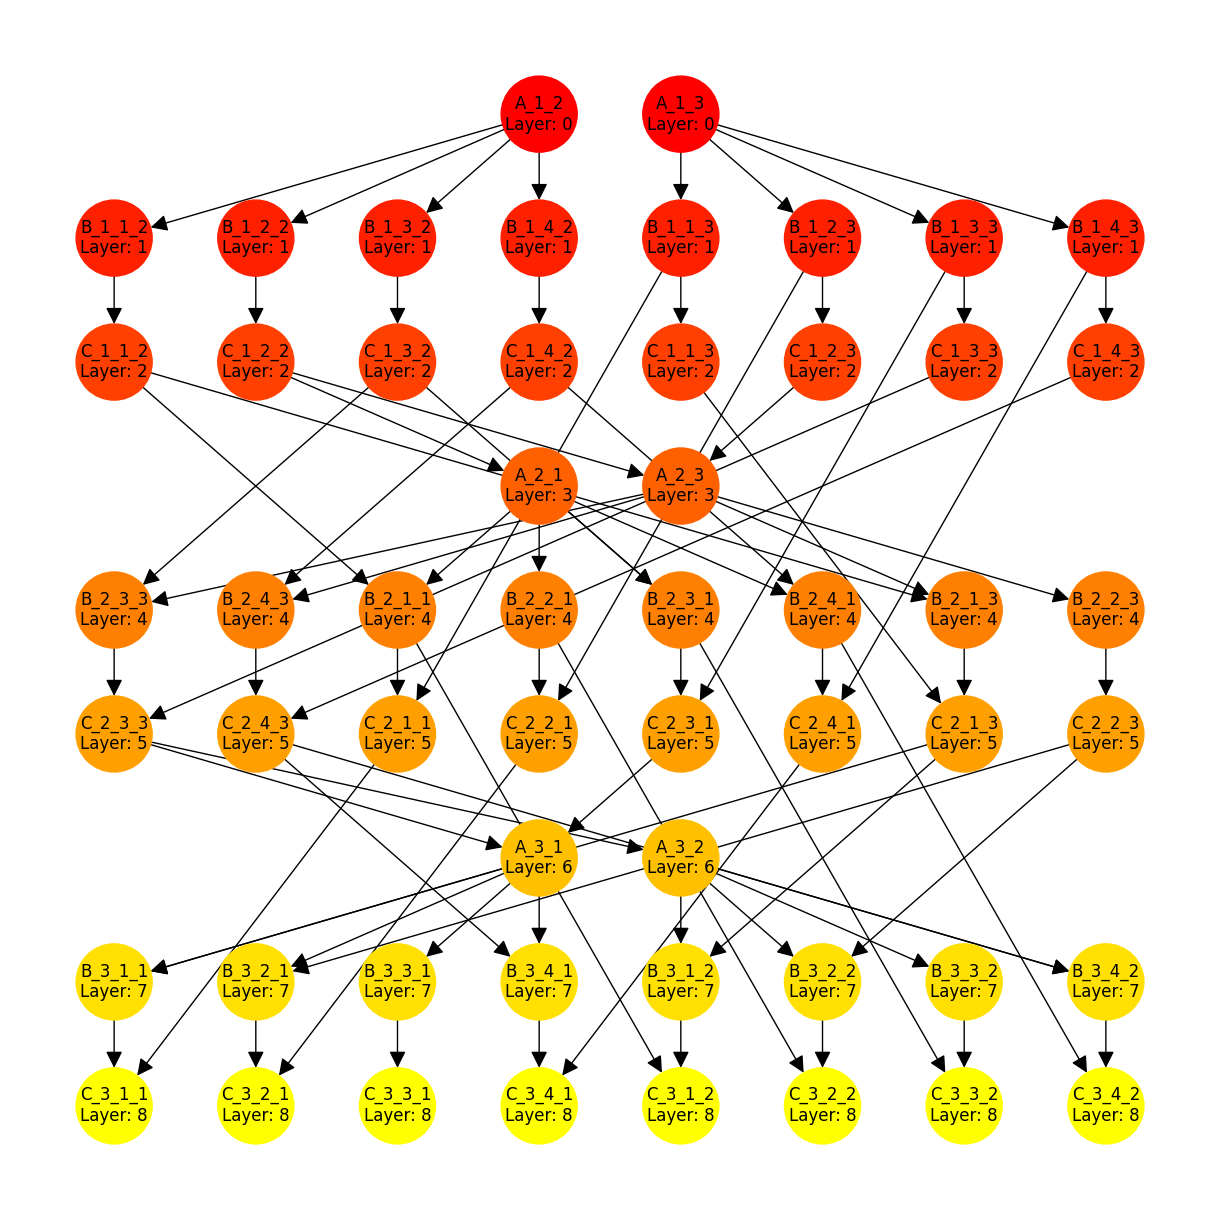

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, no, value):
        self.no = no
        self.value = value
        self.next = set()
        self.layer = 0
    
    def is_connected(self, no):
        if self.no >= no: return self.no == no
    
        for node in self.next:
            if node.is_connected(no):
                return True
        
        return False
    
    def add_next(self, node):
        self.next.add(node)
        node.update_layer(self.layer + 1)

    def update_layer(self, n):
        if n > self.layer:
            self.layer = n
            for node in self.next:
                node.update_layer(n+1)

def make_graph(word):

    graph = []
    for i in range(len(word)):
        node = Node(i, word[i])
        graph.append(node)

    for d in range(1, len(word)):
        for i in range(len(word)-d):
            fst_node: Node = graph[i]
            snd_node: Node = graph[i+d]

            if (fst_node.value, snd_node.value) in D:
                if not fst_node.is_connected(snd_node.no):
                    fst_node.add_next(snd_node)
    
    return graph

graph = make_graph(word)

def plot_graph(graph, tactic='layers'):

    G = nx.DiGraph()

    for node in graph:
        G.add_node(node.no, label=node.value, layer=node.layer)

    for node in graph:
        for nxt in node.next:
            G.add_edge(node.no, nxt.no)

    if tactic=='layers':
        pos = nx.multipartite_layout(G, subset_key="layer")

        for key, coords in pos.items():
            pos[key] = (coords[1], -coords[0])
    else:   
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
    
    layers = [nx.get_node_attributes(G, 'layer')[node] for node in G.nodes()]

    plt.figure(figsize=(12,12))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color=layers, cmap=plt.cm.autumn, arrowsize=25)

    labels = {node.no: f"{node.value}\nLayer: {node.layer}" for node in graph}
    nx.draw_networkx_labels(G, pos, labels)
    plt.show()

plot_graph(graph)

Dla większego n graf jest nieczytelny, ale dla $n=3$ widać bardzo ładnie jak wyglądają klasy Foaty.

## 6. Obliczenie klas Foaty

In [42]:
def printFNF(graph, word):
    no_layers = 0
    for node in graph:
        no_layers = max(no_layers, node.layer)

    FNF = [[] for _ in range(no_layers+1)]

    for node in graph:
        FNF[node.layer].append(node.value)

    print(f"FNF([{word}]) = ", end="")
    for layer in FNF:
        print("(", end=" ")
        for a in layer:
            print(a, end=" ")
        print(")", end=" ")
    print()
    return FNF

FNF = printFNF(graph, word)

FNF([['A_1_2', 'B_1_1_2', 'C_1_1_2', 'B_1_2_2', 'C_1_2_2', 'B_1_3_2', 'C_1_3_2', 'B_1_4_2', 'C_1_4_2', 'A_1_3', 'B_1_1_3', 'C_1_1_3', 'B_1_2_3', 'C_1_2_3', 'B_1_3_3', 'C_1_3_3', 'B_1_4_3', 'C_1_4_3', 'A_2_1', 'B_2_1_1', 'C_2_1_1', 'B_2_2_1', 'C_2_2_1', 'B_2_3_1', 'C_2_3_1', 'B_2_4_1', 'C_2_4_1', 'A_2_3', 'B_2_1_3', 'C_2_1_3', 'B_2_2_3', 'C_2_2_3', 'B_2_3_3', 'C_2_3_3', 'B_2_4_3', 'C_2_4_3', 'A_3_1', 'B_3_1_1', 'C_3_1_1', 'B_3_2_1', 'C_3_2_1', 'B_3_3_1', 'C_3_3_1', 'B_3_4_1', 'C_3_4_1', 'A_3_2', 'B_3_1_2', 'C_3_1_2', 'B_3_2_2', 'C_3_2_2', 'B_3_3_2', 'C_3_3_2', 'B_3_4_2', 'C_3_4_2']]) = ( A_1_2 A_1_3 ) ( B_1_1_2 B_1_2_2 B_1_3_2 B_1_4_2 B_1_1_3 B_1_2_3 B_1_3_3 B_1_4_3 ) ( C_1_1_2 C_1_2_2 C_1_3_2 C_1_4_2 C_1_1_3 C_1_2_3 C_1_3_3 C_1_4_3 ) ( A_2_1 A_2_3 ) ( B_2_1_1 B_2_2_1 B_2_3_1 B_2_4_1 B_2_1_3 B_2_2_3 B_2_3_3 B_2_4_3 ) ( C_2_1_1 C_2_2_1 C_2_3_1 C_2_4_1 C_2_1_3 C_2_2_3 C_2_3_3 C_2_4_3 ) ( A_3_1 A_3_2 ) ( B_3_1_1 B_3_2_1 B_3_3_1 B_3_4_1 B_3_1_2 B_3_2_2 B_3_3_2 B_3_4_2 ) ( C_3_1_1 C_3_2_1 C_

## 7) Konteks algorytmu i obliczenia na macierzy

In [43]:
class GaussJordanContext:
    def __init__(self, matrix):
        self.matrix = matrix
        self.N = len(matrix)
        self.m = {}
        self.n = {}
        
    def print_matrix(self):
        for row in self.matrix:
            print([f"{i}" for i in row])
        print()

    def final_normalization(self):
        for i in range(self.N):
            self.matrix[i][-1] /= self.matrix[i][i]
            self.matrix[i][i] = 1

    def run_task(self, task):
        parts = task.split("_")
        task_type = parts[0]

        if task_type == 'A':
            # liczenie mnożnika: A_i_k -> m_k_i = M_k_i / M_i_i

            i, k = int(parts[1]), int(parts[2])
            self.m[(k, i)] = self.matrix[k-1][i-1] / self.matrix[i-1][i-1]

        elif task_type == 'B':
            # wartość do odjęcia: B_i_j_k -> n_k_i_j = M_i_j * m_k_i

            i, j, k = int(parts[1]), int(parts[2]), int(parts[3])
            self.n[(k, i, j)] = self.matrix[i-1][j-1] * self.m[(k, i)]
        
        elif task_type == 'C':
            # odjęcie: C_i_j_K -> M_k_j = M_k_j - n_k_i_j

            i, j, k = int(parts[1]), int(parts[2]), int(parts[3])
            self.matrix[k-1][j-1] -= self.n[(k, i, j)]
            del self.n[(i, j, k)]

## 8. Scheduler dla klas Foaty

In [44]:
import concurrent.futures

def run_foata_scheduler(FNF, context):
    print("START ALGORYTMU RÓWNOLEGŁEGO...\n")

    with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
        for i, layer in enumerate(FNF):
            print(f"---- WARSTWA {i} ({len(layer)} zadań) ----")
            futures = [executor.submit(context.run_task, task) for task in layer]

            concurrent.futures.wait(futures)

            context.print_matrix()
    
    print("KONIEC OBLICZANIA!\n")

    print("Normalizacja wyników...\n")
    context.final_normalization()
    

In [45]:
def program(input_matrix):
    ctx = GaussJordanContext(input_matrix)
    print("Macierz wejściowa:")
    ctx.print_matrix()

    run_foata_scheduler(FNF, ctx)

    print("Macierz wynikowa: ")
    ctx.print_matrix()
    return ctx.matrix

## 9) Ładownanie plików z testera

In [46]:
import os
def load_matrix(file):

    current_dir = os.getcwd()
    path = os.path.join(current_dir, file)

    if not os.path.exists(path):
        raise FileNotFoundError(f"Nie znaleziono pliku: {path}")
    
    with open(path, 'r') as f:
        lines = f.readlines()
    
    lines = [line.strip() for line in lines]

    if not lines:
        raise ValueError("Plik jest pusty!")
    
    N = int(lines[0])
    matrix = []
    for line in lines[1:-1]:
        row = [float(x) for x in line.split()]
        matrix.append(row)
    
    last_line = lines[-1].split()
    for i in range(N):
        matrix[i].append(float(last_line[i]))

    return matrix

## 10) Testy

In [47]:
import math

def checker():
    in_file = "sprawdzarka/Matrices/unsolved.txt"
    out_file = "sprawdzarka/Matrices/solved.txt"

    matrix = program(load_matrix(in_file))
    check_matrix = load_matrix(out_file)

    print("Wymagana macierz: ")
    
    for row in check_matrix:
        print([f"{i}" for i in row])
    print()

    epsilon = 0.00001
    
    all_ok = True
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if not math.isclose(matrix[i][j], check_matrix[i][j], abs_tol=epsilon):
                print(f"Różnica w wierszu {i}, kolumnie {j}:")
                print(f"   Wynik: {matrix[i][j]}")
                print(f"   Wzorzec: {check_matrix[i][j]}")
                all_ok = False
    assert(all_ok)

checker()

Macierz wejściowa:
['0.6168551130983446', '0.6771634073788637', '0.6094793631479308', '0.28401553694472204']
['0.0', '-0.6083157527778055', '-0.3232922391542591', '0.5356704016080333']
['0.0', '0.0', '-9.146933184267514e-06', '0.3934713827262214']

START ALGORYTMU RÓWNOLEGŁEGO...

---- WARSTWA 0 (2 zadań) ----
['0.6168551130983446', '0.6771634073788637', '0.6094793631479308', '0.28401553694472204']
['0.0', '-0.6083157527778055', '-0.3232922391542591', '0.5356704016080333']
['0.0', '0.0', '-9.146933184267514e-06', '0.3934713827262214']

---- WARSTWA 1 (8 zadań) ----
['0.6168551130983446', '0.6771634073788637', '0.6094793631479308', '0.28401553694472204']
['0.0', '-0.6083157527778055', '-0.3232922391542591', '0.5356704016080333']
['0.0', '0.0', '-9.146933184267514e-06', '0.3934713827262214']

---- WARSTWA 2 (8 zadań) ----
['0.6168551130983446', '0.6771634073788637', '0.6094793631479308', '0.28401553694472204']
['0.0', '-0.6083157527778055', '-0.3232922391542591', '0.5356704016080333']
['

## 11) Inne testy

Żeby przetestować dla innych danych trzeba:
- utworzyć projekt maven w folderze `Matrices`
- uruchomić plik `Generator.java` z Program arguments: `n unsolved.txt solved.txt`, gdzie n to wielkość losowej macierzy
- uruchomić plik `checker.py`